## PROYECTO PONDS

In [176]:
#cargamos la imágen
import imageio as imageio
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from PIL import Image 
import sys
sys.path.insert(0,"C:\\Users\\Margarita Zerpa\\Documents\\INTRODUCCIÓN AL PROCESAMIENTO DE IMAGENES\\TRABAJOS PRACTICOS\\IPDI-2023\\PONDS")

In [119]:
import operaciones_img as ope

In [198]:
im1 = imageio.imread('ponds.bmp')

C:\Users\Margarita Zerpa\AppData\Local\Temp\ipykernel_6828\627909051.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im1 = imageio.imread('ponds.bmp')


In [199]:
def mostrar_imagen_y_histograma(imagen, histograma, bins):
    # Crear una figura con dos subtramas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Subtrama 1: Mostrar la imagen
    ax1.imshow(imagen)
    ax1.set_title("Imagen Normalizada")

    # Subtrama 2: Mostrar el histograma
    ax2.bar(bins[:-1], histograma, width=0.01, align='center', alpha=0.5, color='black')
    ax2.set_title("Histograma")
    ax2.set_xlabel("Valores de pixeles")
    ax2.set_ylabel("Frecuencia")

    # Especificar los valores que deseas mostrar en el eje x
    ax2.set_xticks([0, 0.5, 1])

    # Desactivar la cuadrícula en la subtrama del histograma
    ax2.grid(False)

    # Ajustar el espacio entre las subtramas
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

## VISUALIZAMOS IMAGEN ORIGINAL Y SU HISTOGRAMA

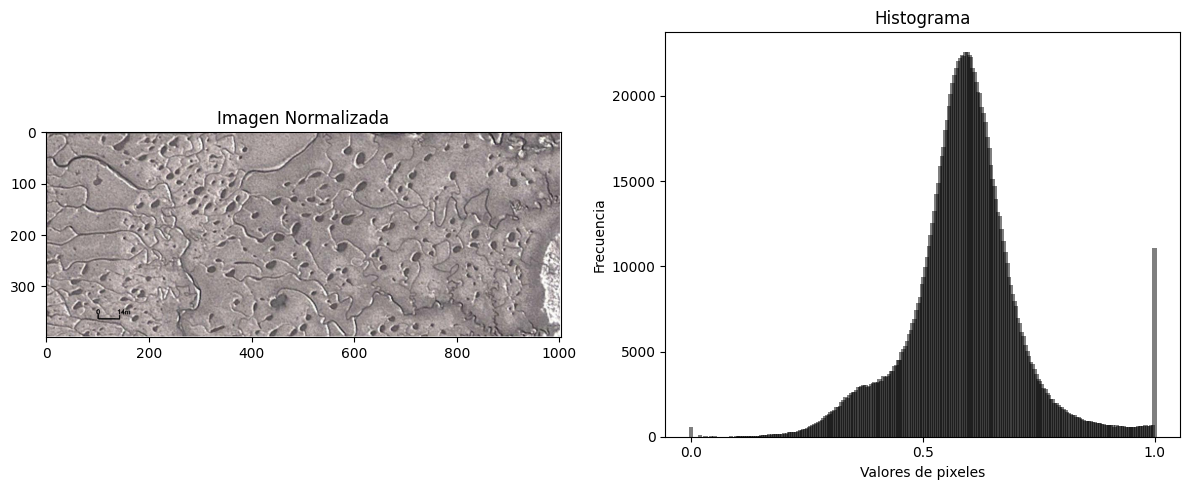

In [230]:
#VISUALIZAMOS IMAGEN ORIGINAL Y SU HISTOGRAMA
imagenNormalizada = ope.normalize_rgb(im1)

# Genera un histograma con 10 columnas
histogram, bins = np.histogram(imagenNormalizada.flatten(), bins=1000, range=(0, 1))

# Suponiendo que ya tienes 'imagenNormalizada' y 'histogram' definidos
mostrar_imagen_y_histograma(imagenNormalizada, histogram, bins)

## APLICACION LINEAL A TRAZOS

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


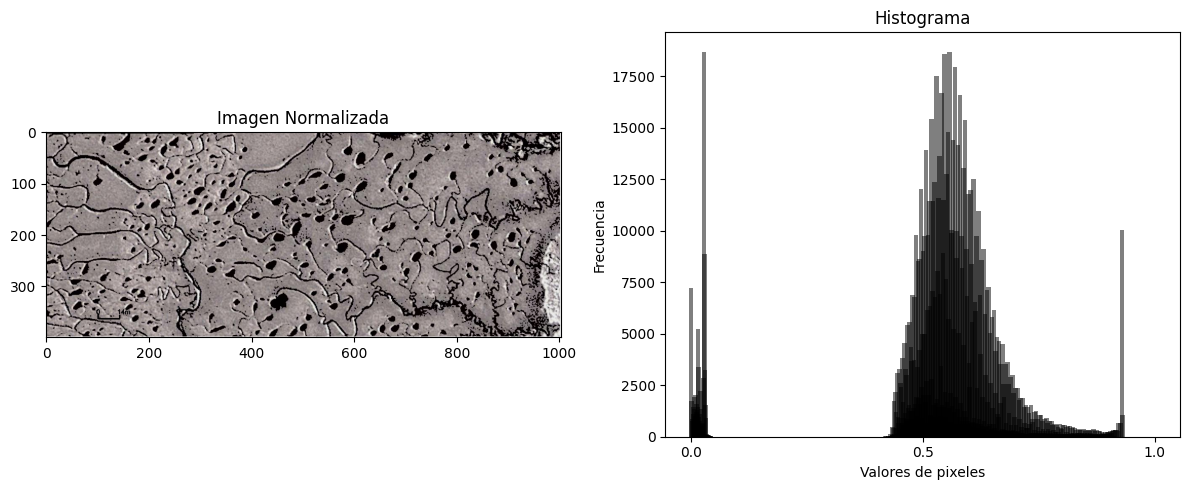

In [231]:
yiq = ope.RGB_to_YIQ(imagenNormalizada)
imagen_binarizada= ope.lineal_a_tarzos(yiq,0.45,1)
imagenProcesada=ope.YIQ_to_RGB(imagen_binarizada)

# mostrar imagen procesada y visualizamos su histograma
histogram1, bins1 = np.histogram(imagenProcesada.flatten(), bins=1000, range=(0, 1))
mostrar_imagen_y_histograma(imagenProcesada, histogram1, bins1)

## APLICACIÓN  MEANSHIFT

In [209]:
from sklearn.cluster import MeanShift, estimate_bandwidth

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


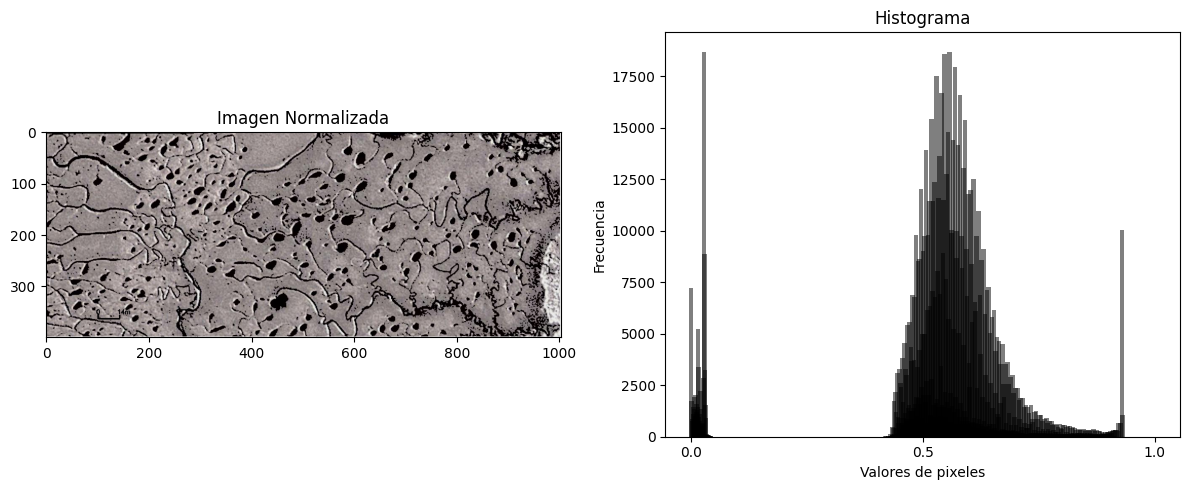

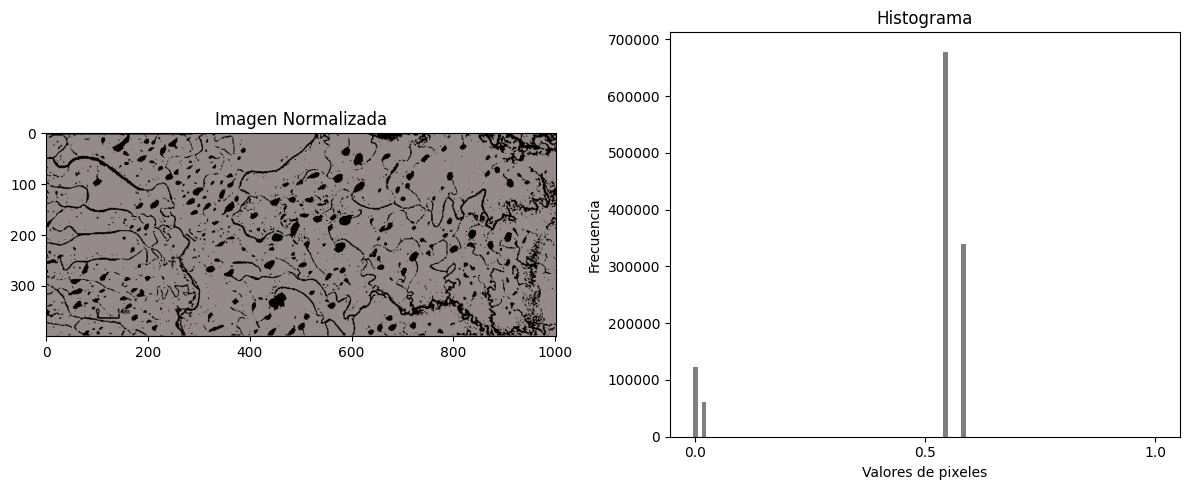

In [232]:
# HISTOGRAMA IMAGEN ORIGINAL
histogram1, bins1 = np.histogram(imagenProcesada.flatten(), bins=1000, range=(0, 1))
mostrar_imagen_y_histograma(imagenProcesada, histogram1, bins1)

# Convertir la imagen procesada a un formato adecuado para MeanShift
original=ope.RGB_to_bytes(imagenProcesada)
imagen_vectorizada = original.reshape(-1, 3)

# Aplicar el algoritmo MeanShift
bandwidth = estimate_bandwidth(imagen_vectorizada, quantile=0.6, n_samples=10000)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(imagen_vectorizada)
# Obtener las etiquetas de los clusters
etiquetas_meanshift = meanshift.labels_


# Obtener los centroides de los clusters
centros_meanshift = meanshift.cluster_centers_

# Reconstruir la imagen original con los colores de los centroides
imagen_reconstruida = centros_meanshift[etiquetas_meanshift].reshape(original.shape).astype(np.uint8)

#normalizamos las imágenes para comparar los histogramas
imegenMeanShift=ope.normalize_rgb(imagen_reconstruida)

# HISTOGRAMA IMAGEN DESPUES DE MEAN SHIFT
histogram1, bins1 = np.histogram(imegenMeanShift.flatten(), bins=1000, range=(0, 1))
mostrar_imagen_y_histograma(imegenMeanShift, histogram1, bins1)

## BINARIZAMOS LOS RESULTADOS DE MEAN SHIFT

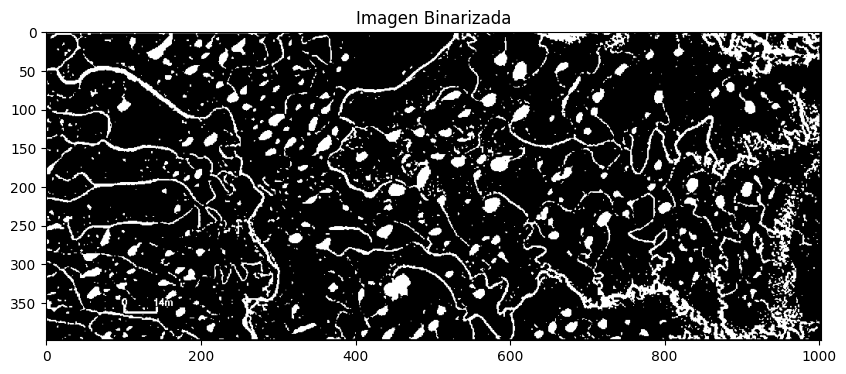

In [233]:
# Convertir las etiquetas a una imagen binarizada
imagen_segmentada = np.reshape(etiquetas_meanshift, original.shape[:2])
imagen_binarizada = np.zeros_like(imagen_segmentada)
imagen_binarizada[imagen_segmentada != 0] = 255
# Mostrar la imagen binarizada
plt.figure(figsize=(10, 10))
plt.imshow(imagen_binarizada, cmap='gray')  # Usar cmap='gray' para mostrar en escala de grises
plt.title('Imagen Binarizada')
plt.show()

## APLICAMOS LA MEDIANA PARA ELIMINAR RUIDO

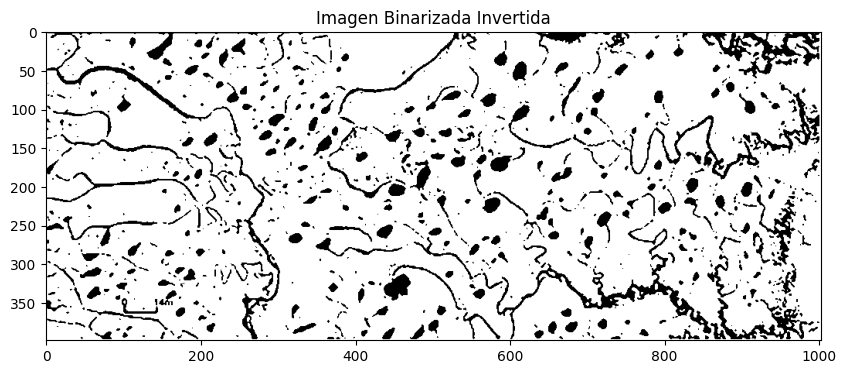

In [234]:
imagen_filtrada = np.zeros(imagen_binarizada.shape)

imagen_filtrada = ope.im_mediana(imagen_binarizada, np.ones((3, 3), bool))
# Mostrar la imagen binarizada
# Invertir los píxeles negros y blancos
imagen_filtrada = 255 - imagen_filtrada

# Mostrar la imagen invertida
plt.figure(figsize=(10, 10))
plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Imagen Binarizada Invertida')
plt.show()

## OBTENEMOS LOS CONTORNOS

In [235]:
print(imagen_filtrada.shape)
imagesave = ope.RGB_to_bytes(imagen_filtrada.astype(np.uint8))
print(imagesave.astype)

(399, 1003)
<built-in method astype of numpy.ndarray object at 0x000001630ACEF9F0>


In [236]:
# Extrae los contornos de los objetos
import cv2


contornos, _ = cv2.findContours(imagesave.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
'''
findContours devuelve una tupla donde el primer elemento es la lista de contornos y el segundo elemento es la jerarquía de contornos.
En este caso, solo nos interesa la lista de contornos, por eso usamos _ para ignorar el segundo elemento de la tupla.
'''

# Imprimir la cantidad de contornos
print("Cantidad de contornos:", len(contornos))

Cantidad de contornos: 1005


## GRAFICAMOS LOS CONTORNOS Y ETIQUEAMOS 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Area:  781.5
Perimetro:  126.95331692695618


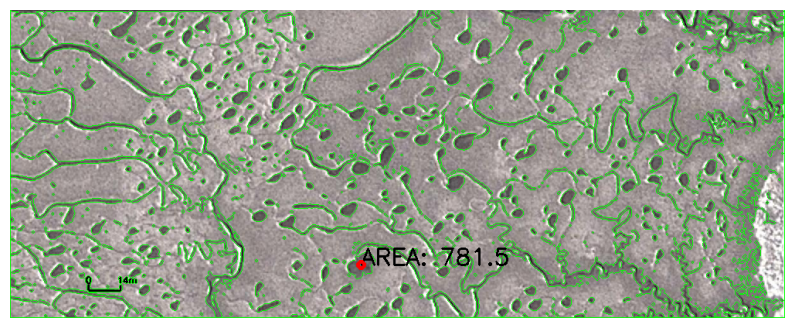

In [237]:
# Dibuja los contornos rectangulares en una imagen de salida
img_output = np.ones_like(imagenProcesada)

cv2.drawContours(imagenNormalizada, contornos, -1, (0, 255, 0), 1)

area = cv2.contourArea(contornos[186])
# Extraemos el perimetro de todos los contornos que hayan
perimetro = cv2.arcLength(contornos[186], True)

print("Area: ", area)
print("Perimetro: ", perimetro)

# Toma las medidas de los objetos, los identifica como un rectángulo
x, y, ancho, alto = cv2.boundingRect(contornos[186])

# Calcula el centro del rectángulo
centro_x = x + ancho // 2
centro_y = y + alto // 2

# Convierte el área a una cadena (string)
area_str = str(area)

# Muestra el área en el centro del contorno
cv2.putText(imagenNormalizada, 'AREA: ' + area_str, (centro_x, centro_y),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
cv2.circle(imagenNormalizada, (centro_x, centro_y), 4, (255, 0, 0), 3)


plt.figure(figsize=(10, 10))
plt.imshow(imagenNormalizada)
plt.axis('off')
plt.show()

In [96]:
index = 0
seleccionados = []
# Eliminamos los contornos pequeños
for cont in contornos:
    
    # Extraemos el área de todos los contornos que hayan
    area = cv2.contourArea(cont)
    # Extraemos el perimetro de todos los contornos que hayan
    perimetro = cv2.arcLength(cont, True)
    
    if 600<area<800:#si el área es mayor imprimo
        print("Contorno: ", index)
        print("Area: ", area)
        print("Perimetro: ", perimetro)
        seleccionados.append(cont)
    index +=1

print(len(seleccionados))

Contorno:  186
Area:  781.5
Perimetro:  126.95331692695618
Contorno:  701
Area:  748.5
Perimetro:  374.9777022600174
Contorno:  798
Area:  702.5
Perimetro:  291.6639940738678
Contorno:  999
Area:  794.5
Perimetro:  239.09545290470123
4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


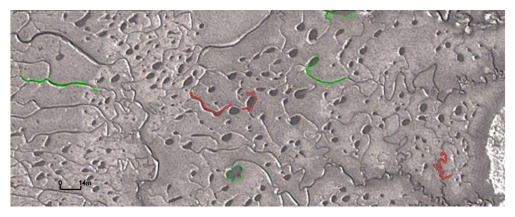

In [97]:
# Dibuja los contornos rectangulares en una imagen de salida
img_output = np.ones_like(imagenProcesada)

cv2.drawContours(imagenNormalizada, seleccionados, -1, (0, 255, 0), 1)
plt.axis('off')
plt.imshow(imagenNormalizada);

## APLICACION MEAN SHIFT

In [ ]:
def mean_shift_yiq(image_yiq, window_size, max_iterations=100, convergence_threshold=1e-5):
    height, width, _ = image_yiq.shape

    # Inicializamos una copia de la imagen para almacenar el resultado
    result_yiq = np.copy(image_yiq)

    for y in range(height):
        for x in range(width):
            # Paso 1: Definimos la ventana alrededor del punto actual
            window_yiq = image_yiq[max(0, y - window_size):min(height, y + window_size),
                                   max(0, x - window_size):min(width, x + window_size)]

            # Paso 2: Calculamos la media ponderada
            while True:
                # Calculamos el centro de masa de la ventana
                weighted_sum = np.sum(window_yiq, axis=(0, 1))
                total_weight = window_yiq.size
                mean_yiq = weighted_sum / total_weight

                # Paso 3: Desplazamos la ventana al nuevo valor de la media
                new_window_yiq = image_yiq[max(0, y - window_size):min(height, y + window_size),
                                            max(0, x - window_size):min(width, x + window_size)]
                new_weighted_sum = np.sum(new_window_yiq, axis=(0, 1))
                new_total_weight = new_window_yiq.size
                new_mean_yiq = new_weighted_sum / new_total_weight

                # Verificamos la convergencia
                if np.linalg.norm(mean_yiq - new_mean_yiq) < convergence_threshold:
                    break

                # Actualizamos la ventana
                window_yiq = new_window_yiq

            # Asignamos el nuevo valor al píxel en la imagen de resultado
            result_yiq[y, x] = new_mean_yiq

    return result_yiq


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


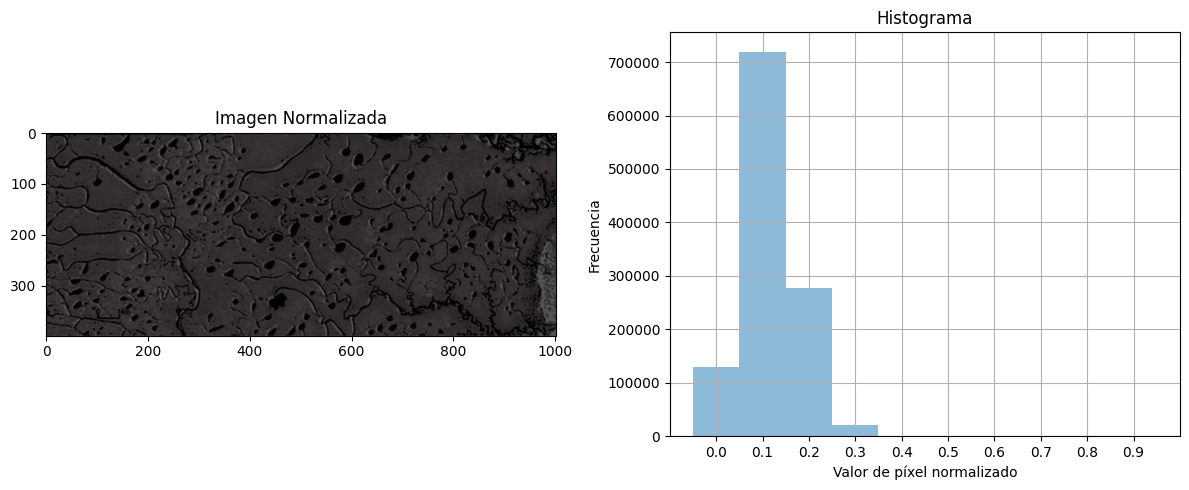

In [ ]:
# Aplicar Mean Shift en el espacio de color YIQ
result_image_yiq = mean_shift_yiq(imagen_binarizada, window_size=1)

# Convertir la imagen resultante de YIQ a RGB
result_image_rgb = YIQ_to_RGB(result_image_yiq)

# Mostrar la imagen procesada y su histograma
histogram2, bins2 = np.histogram(result_image_rgb.flatten(), bins=10, range=(0, 1))
mostrar_imagen_y_histograma(result_image_rgb, histogram2, bins2)

In [ ]:
print(imagen_binarizada1.shape, imagen_binarizada1.dtype)

(399, 1003, 3) float64


## IMPLEMENTACION CON OPEN CV

In [ ]:
import cv2
#from skimage import io
import imageio.v2 as imageio

In [ ]:
print(imagenProcesada1.shape)

(399, 1003, 3)


In [ ]:
def RGB_to_bytes(img):
    image_rgb = (img*255).astype(int)
    return np.clip(image_rgb,0,255)

In [ ]:
imagesave = RGB_to_bytes(imagenProcesada1.astype(np.uint8))

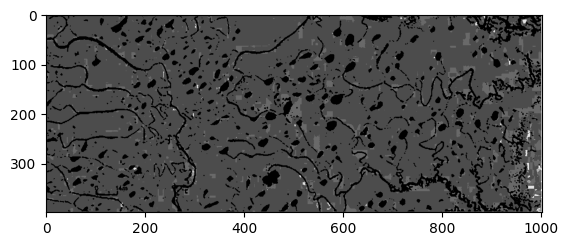

(399, 1003)


In [ ]:
# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagesave.astype(np.uint8), cv2.COLOR_RGB2GRAY)

# Visualizar la imagen en escala de grises
plt.imshow(imagen_gris, cmap='gray')
plt.show()
print(imagen_gris.shape)

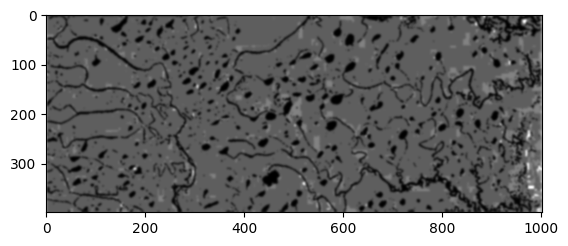

In [ ]:
# Aplicamos suavizado
gaussiano = cv2.GaussianBlur(imagen_gris, (11, 11), 0)
plt.imshow(gaussiano,cmap='gray')

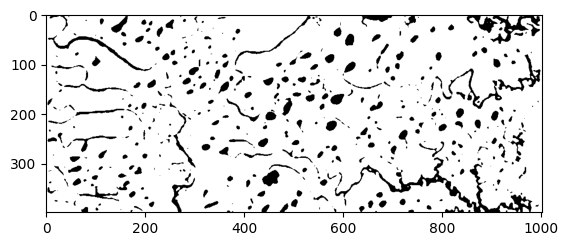

In [ ]:
# Umbralisamos la imagen
ret, umbral = cv2.threshold(gaussiano,40,255,cv2.THRESH_BINARY)
plt.imshow(umbral,cmap='gray')

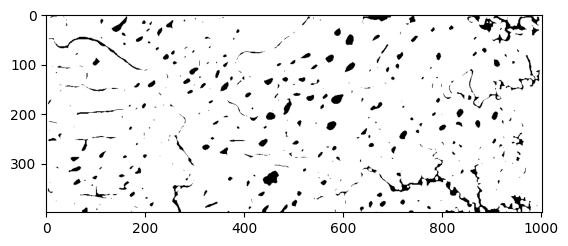

In [ ]:
# Dilatamos los pixeles
dilacion = cv2.dilate(umbral, np.ones((3, 3)))
plt.imshow(dilacion,cmap='gray')

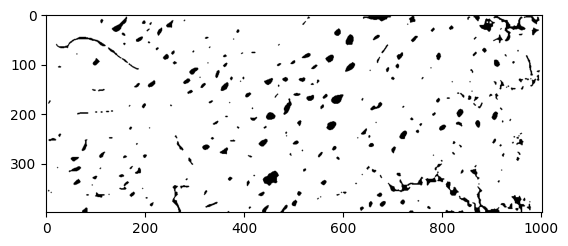

In [ ]:
# Creamos un kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Aplicamos el kernel para juntar los pixeles dispersos
cerrar = cv2.morphologyEx(dilacion, cv2.MORPH_CLOSE, kernel)
plt.imshow(cerrar,cmap='gray')

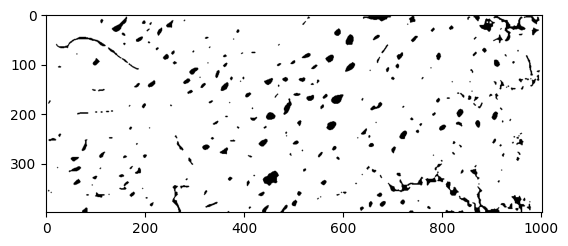

In [ ]:
# Eliminación de ruido
mediana = cv2.medianBlur(cerrar, 1)
plt.imshow(mediana,cmap='gray')

In [ ]:
# Extrae los contornos de los objetos
contornos, _ = cv2.findContours(mediana, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
'''
findContours devuelve una tupla donde el primer elemento es la lista de contornos y el segundo elemento es la jerarquía de contornos.
En este caso, solo nos interesa la lista de contornos, por eso usamos _ para ignorar el segundo elemento de la tupla.
'''

# Imprimir la cantidad de contornos
print("Cantidad de contornos:", len(contornos))

Cantidad de contornos: 293


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


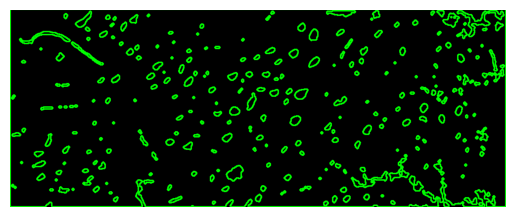

In [ ]:
# Dibuja los contornos rectangulares en una imagen de salida
img_output = np.zeros_like(imagenProcesada1)

cv2.drawContours(img_output, contornos, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(img_output);

In [ ]:
index = 0
# Eliminamos los contornos pequeños
for cont in contornos:
    
    # Extraemos el área de todos los contornos que hayan
    area = cv2.contourArea(cont)
    # Extraemos el perimetro de todos los contornos que hayan
    perimetro = cv2.arcLength(cont, True)
    
    if area > 10:#si el área es mayor imprimo
        print("Contorno: ", index)
        print("Area: ", area)
        print("Perimetro: ", perimetro)
    index +=1

Contorno:  0
Area:  397905.5
Perimetro:  3120.3746703863144
Contorno:  1
Area:  12.0
Perimetro:  13.313708305358887
Contorno:  2
Area:  32.0
Perimetro:  23.313708305358887
Contorno:  3
Area:  24.5
Perimetro:  18.727921724319458
Contorno:  4
Area:  46.0
Perimetro:  25.798989176750183
Contorno:  5
Area:  19.5
Perimetro:  17.55634880065918
Contorno:  6
Area:  37.5
Perimetro:  23.55634891986847
Contorno:  7
Area:  52.5
Perimetro:  32.38477599620819
Contorno:  8
Area:  53.5
Perimetro:  32.04163038730621
Contorno:  9
Area:  16.0
Perimetro:  16.14213526248932
Contorno:  10
Area:  43.0
Perimetro:  25.798989295959473
Contorno:  11
Area:  114.0
Perimetro:  59.94112479686737
Contorno:  12
Area:  105.0
Perimetro:  39.455843687057495
Contorno:  13
Area:  78.5
Perimetro:  35.21320283412933
Contorno:  14
Area:  65.5
Perimetro:  39.213202714920044
Contorno:  16
Area:  105.5
Perimetro:  40.041629910469055
Contorno:  17
Area:  74.5
Perimetro:  33.21320295333862
Contorno:  18
Area:  68.0
Perimetro:  36.6

In [ ]:
 imageio.imwrite('imagesave.bmp', threshl)